# Comparison between SVM and Decision Tree classification
I am going to compare SVM and Decision Trees on classification of handwritten digits.

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import datasets
from sklearn import svm
from sklearn import tree

## Loading the data

In [2]:
digits = datasets.load_digits()

## Creating the classifiers

In [3]:
clfsvm = svm.SVC(gamma=0.001, C=100.)
clftree = tree.DecisionTreeClassifier()

## Running the classifier on the dataset
I have selected the first `tsetlen` elements as the training set, and the rest are checked.
Growing the training set, I expect to see better predictions.
The percentage of misses are stored in `results`, and later used for the report plot.

In [4]:
a = list(range(50,1700,100))
svm_results = []
tree_results = []
for tsetlen in a:
    clftree.fit(digits.data[:tsetlen], digits.target[:tsetlen])
    predicted = clftree.predict(digits.data)
    tsize = len(digits.target)
    missed = [i for i in range(tsize) if digits.target[i] != predicted[i]]
    mlen = len(missed)
    tree_results.append(100*mlen/(tsize - tsetlen))
    
    clfsvm.fit(digits.data[:tsetlen], digits.target[:tsetlen])
    predicted = clfsvm.predict(digits.data)
    tsize = len(digits.target)
    missed = [i for i in range(tsize) if digits.target[i] != predicted[i]]
    mlen = len(missed)
    svm_results.append(100*mlen/(tsize - tsetlen))    

## results
The results are shown in below figure. Although increasing the size of training set decreases the percentage of misses, there is a best size for each classifier's traing set.

It is also shown that the SVM classifier outperforms the Decision Tree classifier.

/home/amin/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


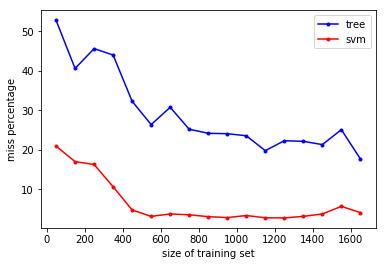

In [5]:
fig1 = plt.figure()
plt.plot(a, tree_results, 'b.-', label='tree')
plt.plot(a, svm_results, 'r.-', label='svm')
plt.legend(loc='best')
ax = fig1.add_subplot(111)
ax.set_xlabel('size of training set')
ax.set_ylabel('miss percentage')
plt.show()